# Dec 21st, 2022 (Parc: subctx)

**Motivation**: New subcortex parcellation, apply k means to the voxel coordinates of 12 major structures <br>

In [1]:
# HIDE CODE


import os
import sys
from pprint import pprint
from copy import deepcopy as dc
from os.path import join as pjoin
from scipy.ndimage import gaussian_filter
from IPython.display import display, IFrame, HTML

# tmp & extras dir
git_dir = pjoin(os.environ['HOME'], 'Dropbox/git')
extras_dir = pjoin(git_dir, 'jb-Ca-fMRI/_extras')
fig_base_dir = pjoin(git_dir, 'jb-Ca-fMRI/figs')
tmp_dir = pjoin(git_dir, 'jb-Ca-fMRI/tmp')

# GitHub
sys.path.insert(0, pjoin(git_dir, '_Ca-fMRI'))
from figures.fighelper import *
from analysis.final import *
from utils.render import *

# warnings, tqdm, & style
warnings.filterwarnings('ignore', category=DeprecationWarning)
from tqdm.notebook import tqdm
%matplotlib inline
set_style()

In [2]:
mice = Mice(128, load_allen=True)

[PROGRESS] 'config.json' saved at
/home/hadi/Documents/Ca-fMRI/processed/norm-global_parcel-columnar_n-128*3

ROI lookup not found, time to run organize_func() . . .

combine metadata not found, time to run cat_data() . . .

In [3]:
%%time

mice.parcel.fit_parcel()

Parcellation not found, initiating fit

[PROGRESS] fit columnar: initiated

[PROGRESS] kmeans fit: done

[PROGRESS] save 2D 10um: done

[PROGRESS] 2d --> 3d: done

[PROGRESS] save 3D 10um: done

[PROGRESS] downsample: done

num regions,    left: 384,  right: 384
region id diff,         r - l:  Counter({384: 384})

[PROGRESS] fit columnar: done

[PROGRESS] fit subcortical: initiated

Warning, region '2' is flat

Warning, region '76' is flat

Warning, region '13' is flat

Warning, region '60' is flat

[PROGRESS] fit subcortical: done

[PROGRESS] 'cols_100um.npy' saved at
/home/hadi/Documents/Ca-fMRI/processed/norm-global_parcel-columnar_n-128*3/parcellation

[PROGRESS] 'brain_100um.npy' saved at
/home/hadi/Documents/Ca-fMRI/processed/norm-global_parcel-columnar_n-128*3/parcellation

[PROGRESS] 'cortex_100um.npy' saved at
/home/hadi/Documents/Ca-fMRI/processed/norm-global_parcel-columnar_n-128*3/parcellation

[PROGRESS] 'cortex-top_100um.npy' saved at
/home/hadi/Documents/Ca-fMRI/processed/norm-global_parcel-columnar_n-128*3/parcellation

[PROGRESS] 'subcortex_100um.npy' saved at
/home/hadi/Documents/Ca-fMRI/processed/norm-global_parcel-columnar_n-128*3/parcellation

[PROGRESS] 'nonzero-idxs_parcel2d-flat_100um.npy' saved at
/home/hadi/Documents/Ca-fMRI/processed/norm-global_parcel-columnar_n-128*3/parcellation

[PROGRESS] 'nonzero-idxs_parcel2d-top_100um.npy' saved at
/home/hadi/Documents/Ca-fMRI/processed/norm-global_parcel-columnar_n-128*3/parcellation

[PROGRESS] 'nonzero-idxs_parcel3d_100um.npy' saved at
/home/hadi/Documents/Ca-fMRI/processed/norm-global_parcel-columnar_n-128*3/parcellation

[PROGRESS] 'region-idxs_parcel2d-flat_100um.npy' saved at
/home/hadi/Documents/Ca-fMRI/processed/norm-global_parcel-columnar_n-128*3/parcellation

[PROGRESS] 'region-idxs_parcel2d-top_100um.npy' saved at
/home/hadi/Documents/Ca-fMRI/processed/norm-global_parcel-columnar_n-128*3/parcellation

[PROGRESS] 'region-idxs_parcel3d_100um.npy' saved at
/home/hadi/Documents/Ca-fMRI/processed/norm-global_parcel-columnar_n-128*3/parcellation

[PROGRESS] 'shape_parcel2d-flat_100um.npy' saved at
/home/hadi/Documents/Ca-fMRI/processed/norm-global_parcel-columnar_n-128*3/parcellation

[PROGRESS] 'shape_parcel2d-top_100um.npy' saved at
/home/hadi/Documents/Ca-fMRI/processed/norm-global_parcel-columnar_n-128*3/parcellation

[PROGRESS] 'shape_parcel3d_100um.npy' saved at
/home/hadi/Documents/Ca-fMRI/processed/norm-global_parcel-columnar_n-128*3/parcellation

[PROGRESS] 'regions.df' saved at
/home/hadi/Documents/Ca-fMRI/processed/norm-global_parcel-columnar_n-128*3/parcellation

[PROGRESS] 'fit_meta.npy' saved at
/home/hadi/Documents/Ca-fMRI/processed/norm-global_parcel-columnar_n-128*3/parcellation

[PROGRESS] save results: done.

CPU times: user 2h 26min 58s, sys: 11min 11s, total: 2h 38min 9s
Wall time: 11min 32s


In [4]:
mice.parcel.fit_meta

{
    'time_start': '2022_12_21,17:14',
    'ctx_missing': [],
    'subctx_num': {
        'OLF': 145,
        'HIP': 74,
        'RHP': 58,
        'CTXsp': 28,
        'STR': 141,
        'PAL': 29,
        'TH': 63,
        'HY': 47,
        'MB': 114,
        'P': 52,
        'MY': 96,
        'CB': 168
    },
    'subctx_bad': {
        'OLF': 2,
        'HIP': 4,
        'RHP': 2,
        'CTXsp': 0,
        'STR': 2,
        'PAL': 0,
        'TH': 0,
        'HY': 2,
        'MB': 2,
        'P': 2,
        'MY': 0,
        'CB': 0
    },
    'time_end': '2022_12_21,17:25'
}

In [5]:
mice.parcel['brain'][80, 10, 43], mice.parcel['cortex'][80, 10, 43], mice.parcel['subcortex'][80, 10, 43]

(360, 360, 0)

In [6]:
list(mice.parcel.results)

[
    'cols',
    'cortex',
    'cortex-top',
    'nonzero-idxs_parcel2d-flat',
    'nonzero-idxs_parcel2d-top',
    'nonzero-idxs_parcel3d',
    'region-idxs_parcel2d-flat',
    'region-idxs_parcel2d-top',
    'region-idxs_parcel3d',
    'shape_parcel2d-flat',
    'shape_parcel2d-top',
    'shape_parcel3d',
    'subcortex',
    'brain'
]

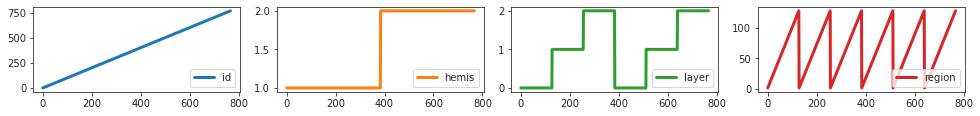

In [3]:
_df = mice.parcel.df.loc[mice.parcel.df['acro'] == 'Isocortex']
fig, axes = create_figure(1, 4, (13.5, 1.5), sharex='all', constrained_layout=True)
for i, item in enumerate(['id', 'hemis', 'layer', 'region']):
    axes[i].plot(_df[item], lw=3, color=f'C{i}', label=item)
    axes[i].legend(loc='lower right')

There are a total of $128 \times 3 \times 2 = 768$ cortical regions. Therefore:
- **id**: runs from 1 to 768. This is the ROI identifier in ```mice.parcel['brain']```.
- **hemis**: has two values,
    - 1 = left hemisphere
    - 2 = right hemisphere
- **layer**: has three values,
    - 0 = shallow (cortical layers 1, 2/3, and 4)
    - 1 = intermediate (cortical layer 5)
    - 2 = deep (cortical layers 6a/b)
- **region**: runs from 1 to 128, because there are 128 parcels in the dorsal flatmap per hemisphere.

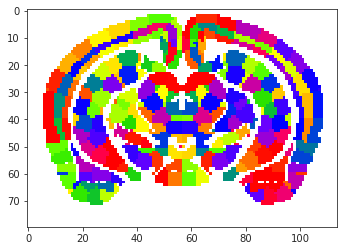

In [7]:
x2p = mice.parcel['brain'][80].copy()
for i, r in enumerate(np.unique(x2p[x2p.nonzero()]), start=1):
    x2p[x2p == r] = i
x2p = mwh(x2p == 0, x2p)
plt.imshow(x2p, cmap='prism');

In [8]:
regions = np.unique(mice.parcel['brain'][mice.parcel['brain'].nonzero()])
len(regions)

2782

In [9]:
mice.parcel.get(35)

{'id': 35, 'acro': 'Isocortex', 'hemis': 1, 'region': 35, 'layer': 0}

In [10]:
mice.parcel.get(35 + 128 * 3)

{'id': 419, 'acro': 'Isocortex', 'hemis': 2, 'region': 35, 'layer': 0}

In [11]:
mice.parcel.encode(1, 35, 0), mice.parcel.encode(2, 35, 0)

(35, 419)

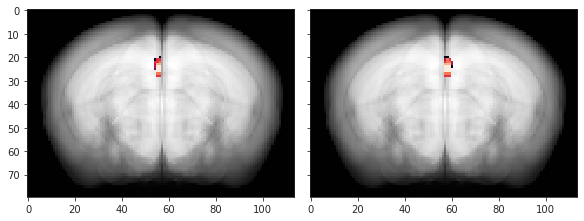

In [12]:
fig, axes = create_figure(1, 2, (8, 3), 'all', 'all', constrained_layout=True)
for ax in axes.flat:
    ax.imshow(mice.al.template.mean(0), cmap='Greys_r')
    
x2p = (mice.parcel['brain'] == 35).mean(0)
axes[0].imshow(mwh(x2p == 0, x2p))

x2p = (mice.parcel['brain'] == 419).mean(0)
axes[1].imshow(mwh(x2p == 0, x2p))

plt.show()

In [13]:
mice.parcel.get(90)

{'id': 90, 'acro': 'Isocortex', 'hemis': 1, 'region': 90, 'layer': 0}

In [14]:
mice.parcel.get(90 + 128 * 3)

{'id': 474, 'acro': 'Isocortex', 'hemis': 2, 'region': 90, 'layer': 0}

In [15]:
mice.parcel.encode(1, 90, 0), mice.parcel.encode(2, 90, 0)

(90, 474)

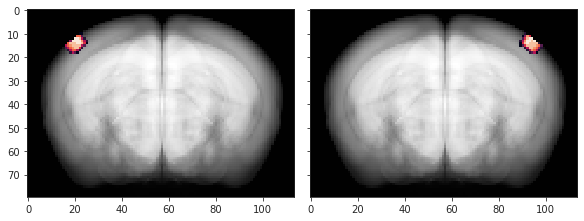

In [16]:
fig, axes = create_figure(1, 2, (8, 3), 'all', 'all', constrained_layout=True)
for ax in axes.flat:
    ax.imshow(mice.al.template.mean(0), cmap='Greys_r')
    
x2p = (mice.parcel['brain'] == 90).mean(0)
axes[0].imshow(mwh(x2p == 0, x2p))

x2p = (mice.parcel['brain'] == 474).mean(0)
axes[1].imshow(mwh(x2p == 0, x2p))

plt.show()

In [17]:
df = mice.parcel.df.loc[mice.parcel.df['acro'] == 'HIP']
df

,id,acro,hemis,region,layer
1056,1057,HIP,1,1057,-1
1057,1058,HIP,1,1058,-1
1058,1059,HIP,1,1059,-1
1059,1060,HIP,1,1060,-1
1060,1061,HIP,1,1061,-1
...,...,...,...,...,...
1195,1196,HIP,2,1124,-1
1196,1197,HIP,2,1125,-1
1197,1198,HIP,2,1126,-1
1198,1199,HIP,2,1127,-1


In [18]:
r = 1084
mice.parcel.get(r)

{'id': 1084, 'acro': 'HIP', 'hemis': 1, 'region': 1084, 'layer': -1}

In [19]:
mice.parcel.df.loc[mice.parcel.df['region'] == r]

,id,acro,hemis,region,layer
1083,1084,HIP,1,1084,-1
1155,1156,HIP,2,1084,-1


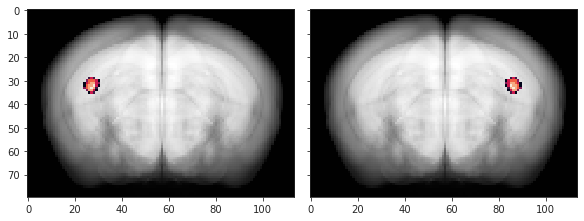

In [20]:
fig, axes = create_figure(1, 2, (8, 3), 'all', 'all', constrained_layout=True)
for ax in axes.flat:
    ax.imshow(mice.al.template.mean(0), cmap='Greys_r')
    
x2p = (mice.parcel['brain'] == 1084).mean(0)
axes[0].imshow(mwh(x2p == 0, x2p))

x2p = (mice.parcel['brain'] == 1156).mean(0)
axes[1].imshow(mwh(x2p == 0, x2p))

plt.show()

### Cortex symmetry score is not 1!

In [21]:
m1 = mice.parcel['cortex'] > 0
m2 = mice.parcel['subcortex'] > 0

overlap_score(m1, m2)

0.0

In [22]:
symmetry_score(m1, mice.al.mask_l, mice.al.mask_r)

0.9918918918918919

In [23]:
symmetry_score(m2, mice.al.mask_l, mice.al.mask_r)

1.0

In [24]:
regions_ctx = np.unique(mice.parcel['cortex'][mice.parcel['cortex'].nonzero()])
len(regions_ctx)

768

In [25]:
regions_subctx = np.unique(mice.parcel['subcortex'][mice.parcel['subcortex'].nonzero()])
len(regions_subctx)

2014

In [26]:
sum(mice.parcel.fit_meta['subctx_num'].values()) * 2, sum(mice.parcel.fit_meta['subctx_bad'].values())

(2030, 16)

In [27]:
sum(mice.parcel.fit_meta['subctx_num'].values()) * 2 - sum(mice.parcel.fit_meta['subctx_bad'].values())

2014

In [28]:
set(regions_ctx).intersection(regions_subctx)

set()

In [29]:
len(regions_ctx) + len(regions_subctx), len(mice.parcel.df)

(2782, 2782)

### Distribution of region sizes
Cortex is wider, but it makes sense

In [30]:
sizes_ctx = {
    r: (mice.parcel['cortex'] == r).sum() for r in
    np.unique(mice.parcel['cortex'][mice.parcel['cortex'].nonzero()])
}
sizes_subctx = {
    r: (mice.parcel['subcortex'] == r).sum() for r in
    np.unique(mice.parcel['subcortex'][mice.parcel['subcortex'].nonzero()])
}

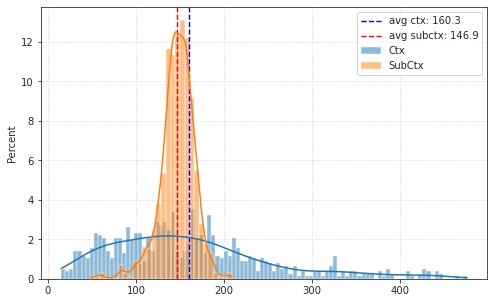

In [31]:
fig, ax = create_figure(1, 1, (8, 5))

sz = list(sizes_ctx.values())
ax.axvline(np.mean(sz), color='b', lw=1.4, ls='--', label=f'avg ctx: {np.mean(sz):0.1f}')
sns.histplot(sz, color='C0', bins=100, stat='percent', label='Ctx', kde=True, ax=ax)

sz = list(sizes_subctx.values())
ax.axvline(np.mean(sz), color='r', lw=1.4, ls='--', label=f'avg subctx: {np.mean(sz):0.1f}')
sns.histplot(sz, color='C1', bins=30, stat='percent', label='SubCtx', kde=True, ax=ax)

ax.grid()
ax.legend()
plt.show()

## Old (draft)

In [93]:
major = mice.al.get_major_12()
major

[
    'Isocortex',
    'OLF',
    'HIP',
    'RHP',
    'CTXsp',
    'STR',
    'PAL',
    'TH',
    'HY',
    'MB',
    'P',
    'MY',
    'CB'
]

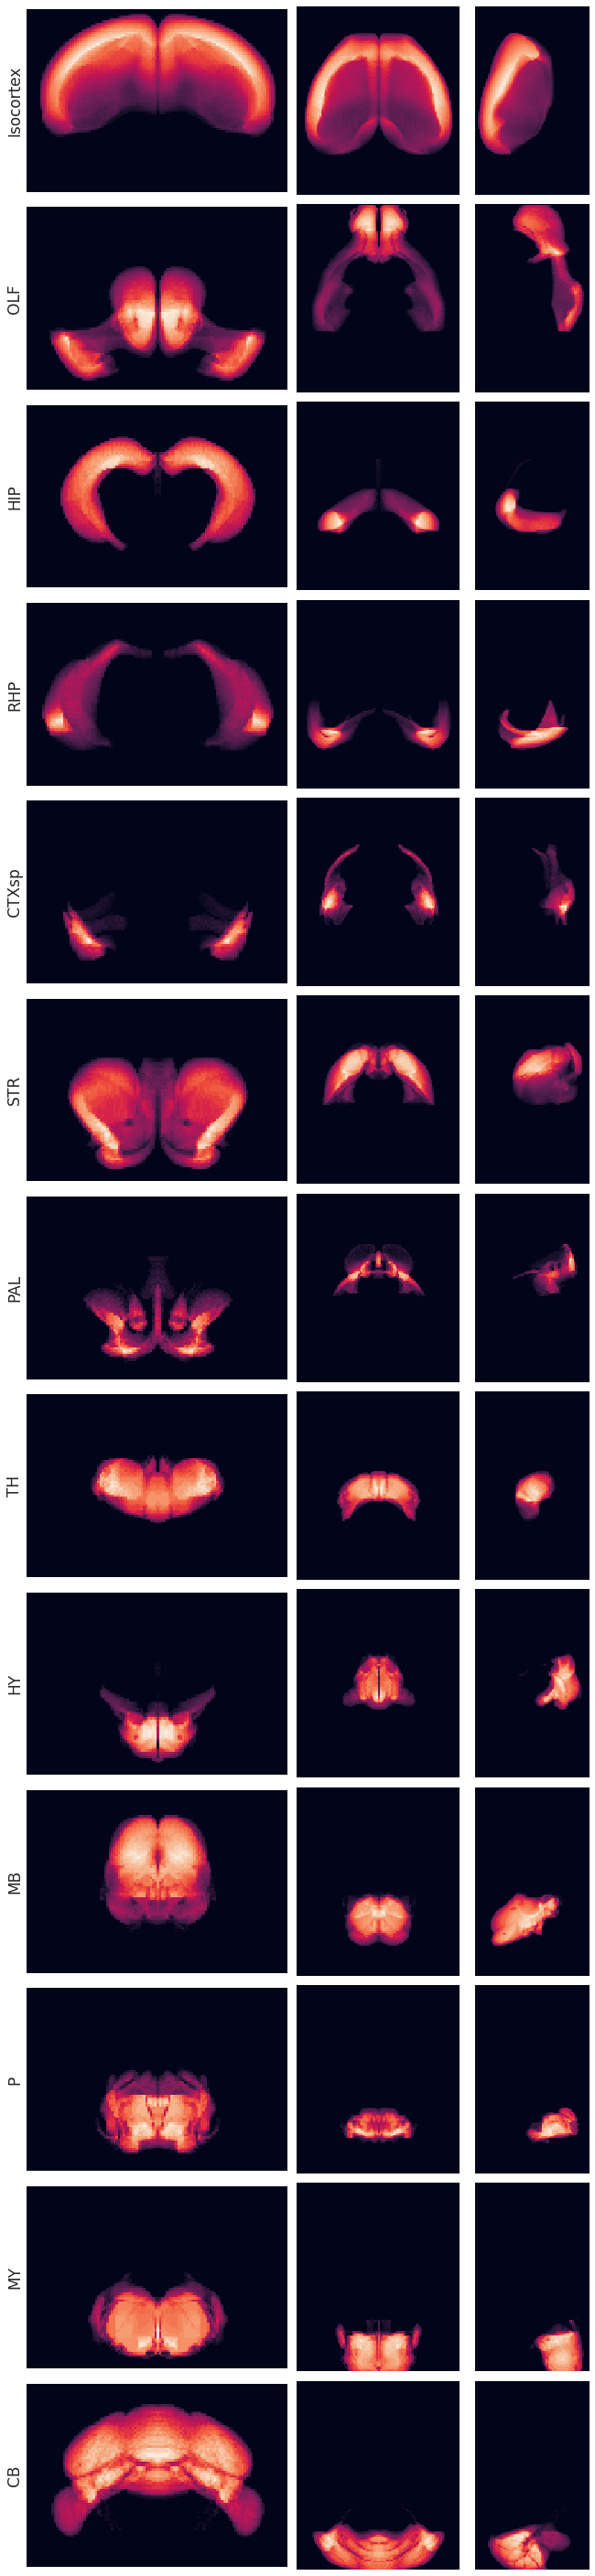

In [6]:
fig, axes = create_figure(
    nrows=len(major),
    ncols=3,
    figsize=(9, 3 * len(major)),
    width_ratios=[2, 1.3, 1],
    constrained_layout=True,
)
for i, acro in enumerate(major):
    mask = mice.al.get_masks(acro)
    axes[i, 0].set_ylabel(acro, fontsize=17)
    for j in range(3):
        axes[i, j].imshow(mask.mean(j))
remove_ticks(axes)
plt.show()

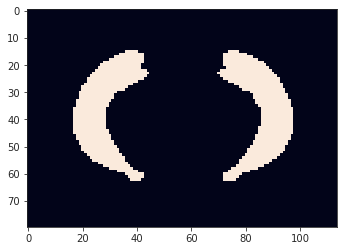

In [91]:
mask = mice.al.get_masks('HIP')
plt.imshow(mask[80]);

In [92]:
parc_output = kmeans_parcellation(mask, 10)
list(parc_output)

Intel(R) Extension for Scikit-learn* enabled (https://github.com/intel/scikit-learn-intelex)


['regions', 'parcel', 'eroded', 'cluster_centers', 'mask_l', 'mask_r', 'radius']

In [93]:
parc_output['regions']

array([ 1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16, 17,
       18, 19, 20])

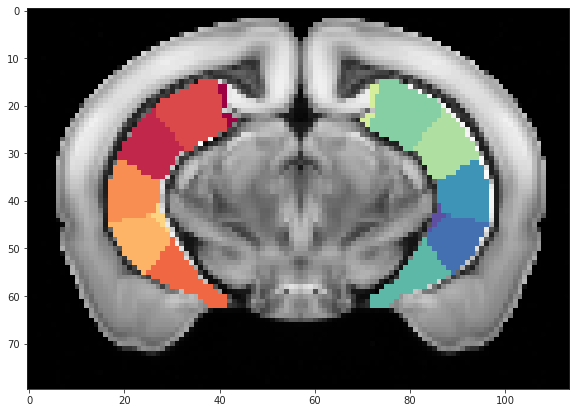

In [94]:
fig, ax = create_figure(1, 1, (12, 7))

ax.imshow(mice.al.template[80], cmap='Greys_r')
ax.imshow(mwh(parc_output['parcel'] == 0, parc_output['parcel'])[80], cmap='Spectral');

In [95]:
overlap_score(parc_output['parcel'] != 0, mask)

1.0

In [96]:
np.logical_and(parc_output['parcel'] != 0, mask).sum(), mask.sum(), (parc_output['parcel'] != 0).sum()

(22076, 23754, 22076)

In [4]:
nonzero_voxels = list(zip(*np.where(x.astype(bool))))
nonzero_voxels = np.reshape(nonzero_voxels, (-1, len(x.shape)))
nonzero_voxels = nonzero_voxels.astype(int)
nonzero_voxels.shape

(42679, 3)

In [5]:
import sklearnex
from sklearn.cluster import KMeans

In [6]:
num_regions = 10

sklearnex.patch_sklearn()
kmeans = KMeans(
    n_clusters=num_regions,
    random_state=42,
).fit(nonzero_voxels.astype(float))
sklearnex.unpatch_sklearn()

roi = kmeans.predict(nonzero_voxels.astype(float))

Intel(R) Extension for Scikit-learn* enabled (https://github.com/intel/scikit-learn-intelex)


In [7]:
roi_unique = []
for lbl in roi:
    if lbl not in roi_unique:
        roi_unique.append(lbl)
mapping = {lbl: i + 1 for i, lbl in enumerate(roi_unique)}
mapping

{6: 1, 2: 2, 7: 3, 5: 4, 1: 5, 3: 6, 4: 7, 0: 8, 8: 9, 9: 10}

In [8]:
roi_relabeld = np.zeros_like(roi)
for lbl in roi_unique:
    roi_relabeld[roi == lbl] = mapping[lbl]

In [9]:
atlas_kmeans_dict = collections.defaultdict(list)
for voxel, lbl in zip(nonzero_voxels, roi_relabeld):
    atlas_kmeans_dict[lbl].append(tuple(voxel))
atlas_kmeans_dict = dict(atlas_kmeans_dict)

In [10]:
list(atlas_kmeans_dict)

[1, 2, 3, 4, 5, 6, 7, 8, 9, 10]

In [11]:
atlas_kmeans = np.zeros(x.shape, dtype=int)
for region_id, voxel_list in atlas_kmeans_dict.items():
    atlas_kmeans[tuple(zip(*voxel_list))] = region_id

cluster_centers = {
    mapping[lbl]: kmeans.cluster_centers_[lbl]
    for lbl in roi_unique
}

<matplotlib.image.AxesImage object at 0x7f95e800d760>

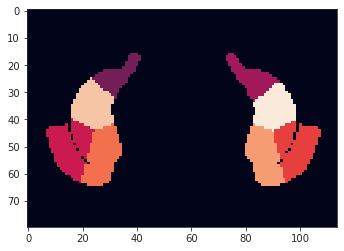

In [15]:
plt.imshow(atlas_kmeans[90])

In [30]:
tree, _ = mice.al.get_subtree(8, 3)

grey (8)
├── BS (343)
│   ├── HB (1065)
│   ├── IB (1129)
│   └── MB (313)
├── CB (512)
│   ├── CBN (519)
│   └── CBX (528)
└── CH (567)
    ├── CNU (623)
    └── CTX (688)



<matplotlib.image.AxesImage object at 0x7f9533fd20d0>

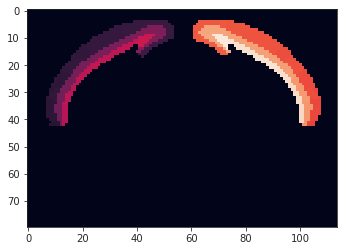

In [104]:
plt.imshow(mice.parcel['cortex'][90])

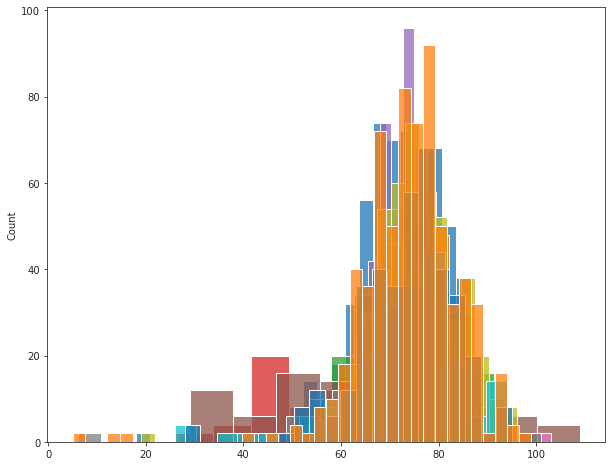

In [197]:
fig, ax = create_figure(1, 1, (10, 8))
for i, (acro, d) in enumerate(parc.items()):
    sz = {r: (d['parcel'] == r).sum() for r in d['regions']}
    sns.histplot(list(sz.values()), color=f'C{i}', label=acro, ax=ax)

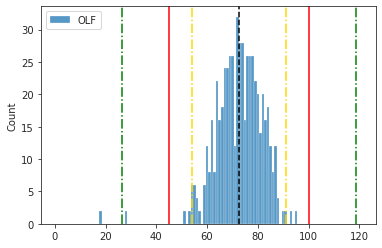

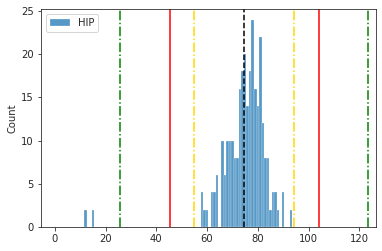

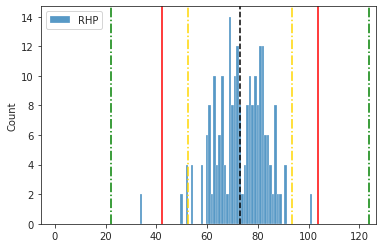

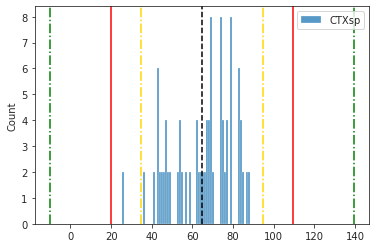

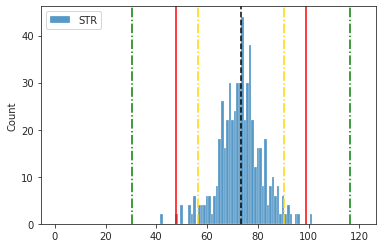

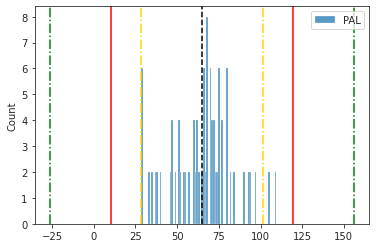

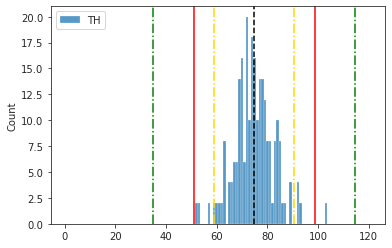

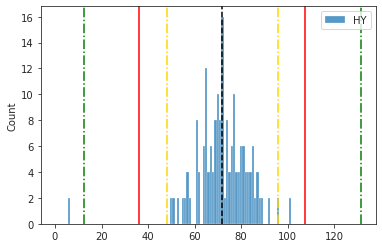

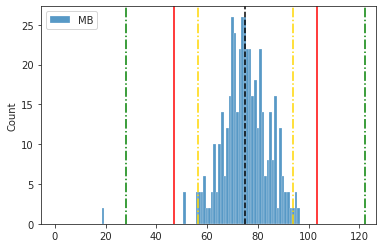

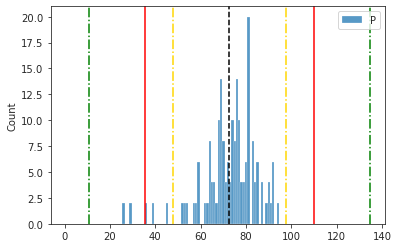

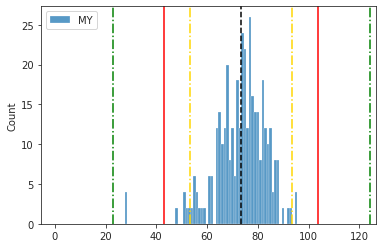

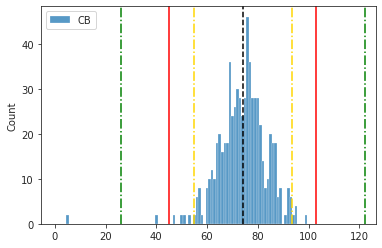

In [210]:
for i, (acro, d) in enumerate(parc.items()):
    sz = {r: (d['parcel'] == r).sum() for r in d['regions']}
    sz = list(sz.values())
    sns.histplot(sz, bins=np.linspace(0, 120, 121) + 0.5, label=acro)
    mu, sd = np.mean(sz), np.std(sz)
    plt.axvline(mu, color='k', ls='--')
    plt.axvline(mu - 2 * sd, color='gold', ls='-.')
    plt.axvline(mu + 2 * sd, color='gold', ls='-.')
    plt.axvline(mu - 3 * sd, color='r', ls='-')
    plt.axvline(mu + 3 * sd, color='r', ls='-')
    plt.axvline(mu - 5 * sd, color='g', ls='-.')
    plt.axvline(mu + 5 * sd, color='g', ls='-.')
    
    plt.legend()
    plt.show()

In [263]:
r in d['regions'][len(d['regions']) // 2:]

False

In [280]:
nb_std = 3

tot = 0
for i, (acro, d) in enumerate(parc.items()):
    sizes = {
        r: (d['parcel'] == r).sum()
        for r in d['regions']
    }
    sz = list(sizes.values())
    mu, sd = np.mean(sz), np.std(sz)
    bad_l = [
        r for r, s in sizes.items() if (
            s <= mu - nb_std * sd and
            r in d['regions'][:len(d['regions'])//2]
        )
    ]
    bad_r = [
        r for r, s in sizes.items() if (
            s <= mu - nb_std * sd and
            r in d['regions'][len(d['regions'])//2:]
        )
    ]
    bad = sorted(set(
        bad_l + [r + len(d['regions']) // 2 for r in bad_l]).union(
        bad_r + [r - len(d['regions']) // 2 for r in bad_r]
    ))
    print(acro, len(bad), len(d['regions']), 100 * len(bad) / len(d['regions']))
    tot += len(bad)

OLF 4 580 0.6896551724137931

HIP 4 296 1.3513513513513513

RHP 2 230 0.8695652173913043

CTXsp 0 110 0.0

STR 2 562 0.35587188612099646

PAL 0 116 0.0

TH 0 252 0.0

HY 2 188 1.0638297872340425

MB 2 458 0.4366812227074236

P 4 208 1.9230769230769231

MY 4 386 1.0362694300518134

CB 4 670 0.5970149253731343

In [281]:
tot

28

In [254]:
n_rois

{
    'Isocortex': 769,
    'OLF': 290,
    'HIP': 148,
    'RHP': 115,
    'CTXsp': 55,
    'STR': 281,
    'PAL': 58,
    'TH': 126,
    'HY': 94,
    'MB': 229,
    'P': 104,
    'MY': 193,
    'CB': 335
}

In [241]:
m = d['parcel'] == bad[0]
np.where(m)

(
    array([90, 91, 91, 94, 95]),
    array([56, 55, 59, 57, 57]),
    array([36, 35, 34, 32, 31])
)

<matplotlib.image.AxesImage object at 0x7f9475c7c070>

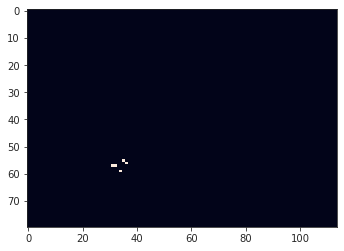

In [253]:
plt.imshow(m.mean(0))

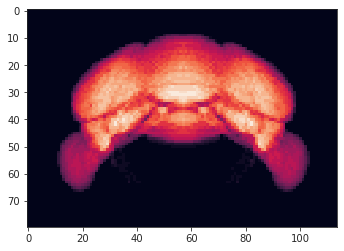

In [251]:
mask = mice.al.get_masks(acro)
plt.imshow(mask.mean(0));

In [ ]:
plt.imshow()

In [134]:
parc_output = kmeans_parcellation(mask, n_rois[acro])
list(parc_output)

Intel(R) Extension for Scikit-learn* enabled (https://github.com/intel/scikit-learn-intelex)


Warning, region '2' is flat

Warning, region '150' is flat

['regions', 'parcel', 'eroded', 'cluster_centers', 'mask_l', 'mask_r', 'radius']

In [140]:
n_rois[acro]

148

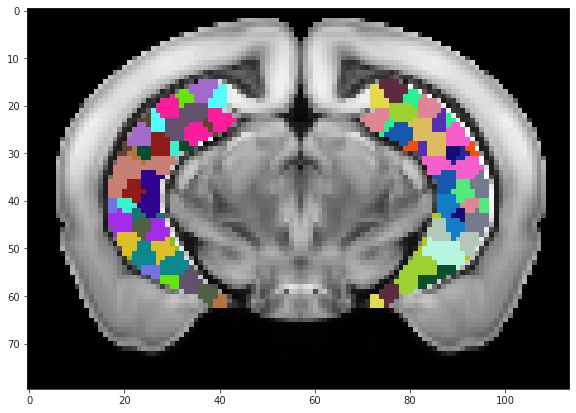

In [161]:
fig, ax = create_figure(1, 1, (12, 7))

x2p = parc_output['parcel'][80]
cm = get_rand_cmap(len(np.unique(x2p[x2p.nonzero()])), rng=get_rng(8))
x2p = mwh(x2p == 0, x2p)

ax.imshow(mice.al.template[80], cmap='Greys_r')
ax.imshow(x2p, cmap=cm);

<AxesSubplot:ylabel='Count'>

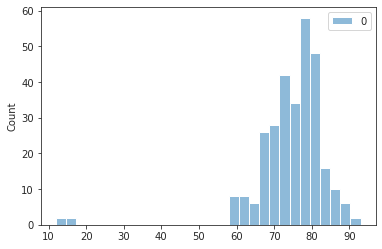

In [177]:
sz = {r: (parc_output['parcel'] == r).sum() for r in parc_output['regions']}
sns.histplot(sz.values())

In [180]:
sz[2], sz[150]

(12, 12)

<matplotlib.image.AxesImage object at 0x7f9486c0da60>

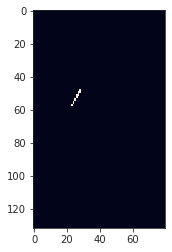

In [188]:
plt.imshow((parc_output['parcel'] == 2).mean(2))